<a href="https://colab.research.google.com/github/JoseArizpe01/ELEE6399-Final_Project_Code/blob/main/Jose_Arizpe_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# test harness for evaluating models on the cifar10 dataset
import sys
import tensorflow as tf
import keras.layers as layers
from keras.layers.pooling.average_pooling2d import AvgPool2D
from keras.layers import Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
#Personal Model
# define cnn model
def define_model():
	model = Sequential()
 
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization())
	model.add(Dropout(0.2))
	model.add(BatchNormalization()) 
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization()) 
	model.add(Dropout(0.3))
	model.add(BatchNormalization())   
 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization()) 
	model.add(Dropout(0.3))
	model.add(BatchNormalization())   

	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization()) 
	model.add(MaxPooling2D((2, 2)))
	model.add(BatchNormalization()) 
	model.add(Dropout(0.4))
	model.add(BatchNormalization())   
    
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization()) 
	model.add(Dropout(0.5))  
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

	#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')  
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.show()
	# save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=200, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 

> 87.750


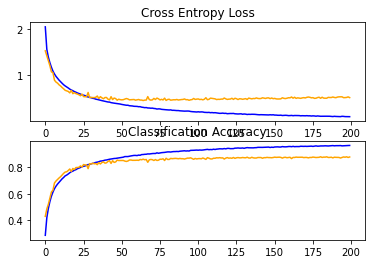

In [ ]:
# entry point, run the test harness
run_test_harness()

In [ ]:
'''
#80+ Percent Accuracy Model
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
  '''

In [ ]:
'''
# define cnn model
#75 % Accuracy Model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
'''

In [ ]:
'''
#60 Percent Accuracy Model
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
'''

In [ ]:
'''
#LeNET
def define_model():
  model = Sequential()
  model.add((Conv2D(filters=6, kernel_size=5, activation='sigmoid',padding='same')))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Conv2D(filters=16, kernel_size=5,activation='sigmoid'))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(120, activation='sigmoid'))
  model.add(Dense(84, activation='sigmoid'))
  model.add(Dense(10, activation ='softmax'))
  #Compile Model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
'''

In [ ]:
'''
#AlexNet
def define_model():
  model = Sequential()
  model.add(Conv2D(filters=96, kernel_size=11, strides=4,input_shape=(32, 32, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=2,strides=1))

  model.add(Conv2D(filters=256, kernel_size=5, padding='same',activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=2,strides=1))

  model.add(Conv2D(filters=384, kernel_size=3, padding='same',activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(Conv2D(filters=384, kernel_size=3, padding='same',activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(Conv2D(filters=384, kernel_size=3, padding='same',activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=2,strides=1))
  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(.05))

  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(.05))

  model.add(Dense(10, activation="softmax"))

  #Compile Model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model
'''